In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
df=pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [206]:
# 표본추출 방법
# (1) 복원추출
np.random.choice([1,2,3],3)

# (2) 비복원추출
np.random.choice([1,2,3],3,replace=False)


array([2, 1, 3])

In [207]:
# 시드를 0으로 하는 무작위 추출은 매번 동일한 결과
np.random.seed(0)
np.random.choice([1,2,3],3)

# 표본크기 20으로 복원 추출 
np.random.seed(0)
sample=np.random.choice(scores,20)
print(sample.mean())

# 무작위 추측
list_percent=[]
for i in range(5):
    sample=np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())
    list_percent.append(sample.mean())
    
# 표본평균의 평균 구하기 : 의미가 있음
print(sum(list_percent)/len(list_percent))


70.4
1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15
69.60999999999999


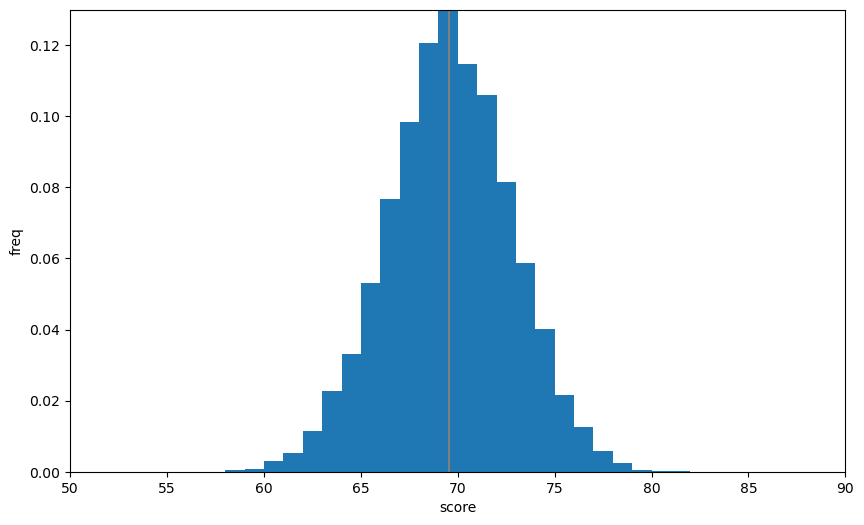

In [208]:
# 표본크기 20인 표본을 추출해서 표본 평균 계산 
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means,bins=100,range=(0,100),density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('freq')
plt.show()

In [209]:
# 함수버전
def short_function(x):
    return x*2
# 람다버전
equiv_anon=lambda x : x*2

def apply_to_list(some_list,f):
    return[f(x) for x in some_list]

ints=[4,0,1,5,6]
apply_to_list(ints,lambda x:x*2)

[8, 0, 2, 10, 12]

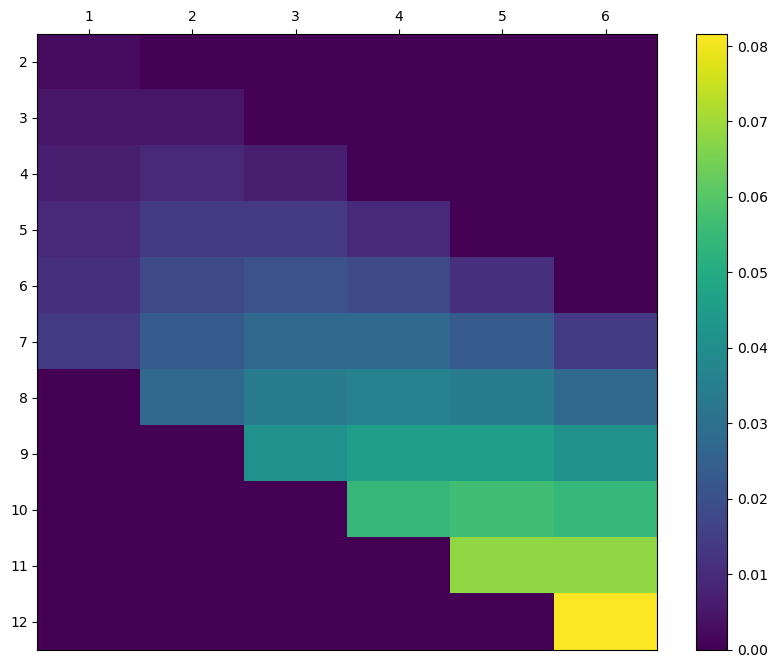

In [210]:
# 2차원 확률분포
x_set=np.arange(2,13)
y_set=np.arange(1,7)

def f_XY(x,y):
    if 1 <= y <= 6 and 1<= x-y <= 6: 
        return y*(x-y) / 441
    else:
        return 0
    
XY=[x_set, y_set, f_XY]

# 2차원 확률분포의 히트맵
prob=np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111)  

c = ax.pcolor(prob)  
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)  
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)  
ax.set_xticklabels(np.arange(1, 7), minor=False)  
ax.set_yticklabels(np.arange(2, 13), minor=False)  

# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다  
ax.invert_yaxis()  

# x축 눈금을 그래프 위쪽에 표시  
ax.xaxis.tick_top()  

fig.colorbar(c, ax=ax)  
plt.show()  

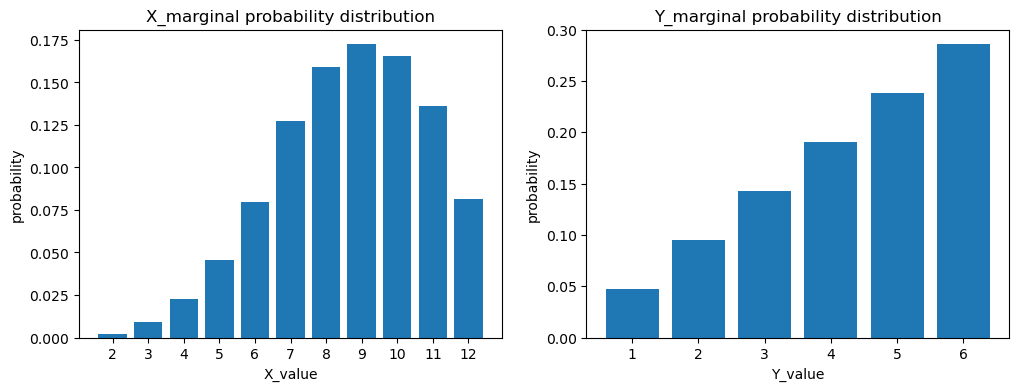

In [211]:
# 주변확률분포
def f_X(x):  
    return np.sum([f_XY(x, y_k) for y_k in y_set])  


def f_Y(y):  
    return np.sum([f_XY(x_k, y) for x_k in x_set])  

X = [x_set, f_X]  
Y = [y_set, f_Y]  

prob_x = np.array([f_X(x_k) for x_k in x_set])  
prob_y = np.array([f_Y(y_k) for y_k in y_set])  

fig = plt.figure(figsize=(12, 4))  
ax1 = fig.add_subplot(121)  
ax2 = fig.add_subplot(122)  

ax1.bar(x_set, prob_x)  
ax1.set_title('X_marginal probability distribution')  
ax1.set_xlabel('X_value')  
ax1.set_ylabel('probability')  
ax1.set_xticks(x_set)  

ax2.bar(y_set, prob_y)  
ax2.set_title('Y_marginal probability distribution')  
ax2.set_xlabel('Y_value')  
ax2.set_ylabel('probability')  

plt.show()  
